<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-data" data-toc-modified-id="Load-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load data</a></span></li><li><span><a href="#Encrypt" data-toc-modified-id="Encrypt-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Encrypt</a></span><ul class="toc-item"><li><span><a href="#Flatten-and-encode" data-toc-modified-id="Flatten-and-encode-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Flatten and encode</a></span></li><li><span><a href="#Padding" data-toc-modified-id="Padding-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Padding</a></span></li><li><span><a href="#Encryption" data-toc-modified-id="Encryption-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Encryption</a></span></li></ul></li><li><span><a href="#Save-encrypted-file" data-toc-modified-id="Save-encrypted-file-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Save encrypted file</a></span><ul class="toc-item"><li><span><a href="#Write" data-toc-modified-id="Write-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Write</a></span></li><li><span><a href="#Read" data-toc-modified-id="Read-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Read</a></span></li><li><span><a href="#Decrypt" data-toc-modified-id="Decrypt-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Decrypt</a></span></li><li><span><a href="#Remove-padding" data-toc-modified-id="Remove-padding-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Remove padding</a></span></li><li><span><a href="#Decode-and-unpickle" data-toc-modified-id="Decode-and-unpickle-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Decode and unpickle</a></span></li><li><span><a href="#Verify" data-toc-modified-id="Verify-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Verify</a></span></li></ul></li><li><span><a href="#Appendix" data-toc-modified-id="Appendix-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Appendix</a></span><ul class="toc-item"><li><span><a href="#What-pickle-is:" data-toc-modified-id="What-pickle-is:-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>What pickle is:</a></span></li><li><span><a href="#Base64" data-toc-modified-id="Base64-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Base64</a></span></li><li><span><a href="#AES" data-toc-modified-id="AES-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>AES</a></span></li></ul></li><li><span><a href="#Example-E2E-file" data-toc-modified-id="Example-E2E-file-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Example E2E file</a></span></li></ul></div>

# Encryption of a complete data file

Simple step by step notebook. Purposely not written in a function; sometimes it is important to understand what is going on.


## Load data

Using MNST dataset

(1797, 64)


<Figure size 432x288 with 0 Axes>

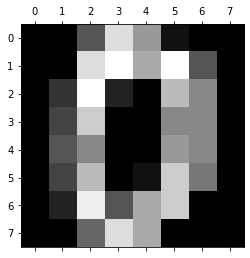

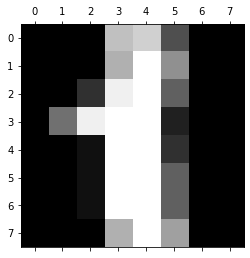

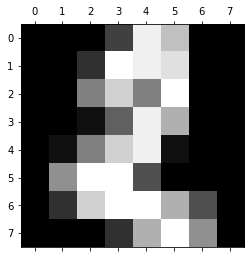

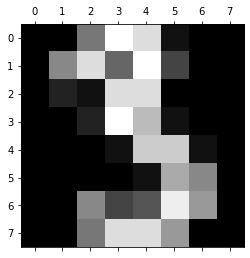

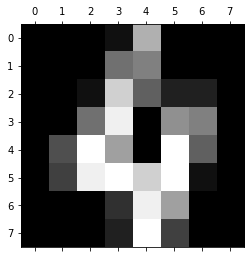

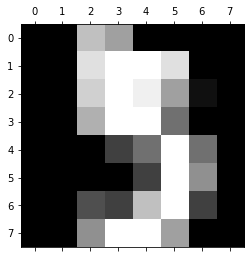

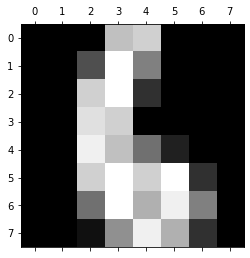

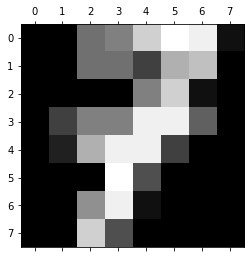

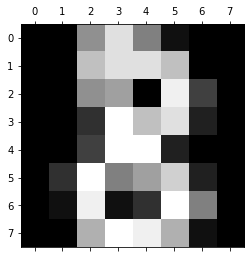

In [116]:
#Load and display
%matplotlib inline
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)

import matplotlib.pyplot as plt 

plt.gray() 
for i in range(0,9):
    plt.matshow(digits.images[i]) 
plt.show() 

In [2]:
data = digits.images

In [3]:
data.shape

(1797, 8, 8)

## Encrypt

Turns out it is a little naive to think it would be straightforward. Basic reason is the encryption works on *textstrings* and not on numbers (this is of course quite logical if you think about it). So numbers, i.e. integers, need to be converted to strings. The average (numeric) data file is an array. Converting this to a single string means trouble. Specifically if you need to reconstruct the original array later. Obviously there is no use in encrypting if it cannot be decrypted.

So, given an array:

1. 'flatten', using pickle
2. encode to make it binary and more concise
3. pad to, in this case, multiples of 16, the block size(encryption works on complete blocks)
4. encrypt  
Do what you need to do, eg. send or store the file
5. decrypt
6. unpad
7. decode
8. unflatten
9. verify (in this case for demonstration purposes)



### Flatten and encode

In [4]:
!dir

/bin/sh: dir: command not found


In [5]:
!ls

AccuracyAndUnbalance.ipynb
Auto_Summary_Legal.ipynb
BayesSummary 3.ipynb
CamelotTest.docx
CamelotTest.pdf
CamelotTestNoBorder.pdf
CltAndLlnIllustration.ipynb
CodeAlongRegressionStacker.ipynb
CodeAlongRegressionStackerSolution.ipynb
ColorStripes.ipynb
CookBooks
DataVizualization.ipynb
DsMasterClass
EmbeddingExample.xlsx
EmbeddingsExample.ipynb
EncryptionExample.ipynb
FrequencySummarizer.py
GeoPandasNetherlands-Copy1.ipynb
GeoPandasNetherlands.ipynb
GuesWho.ipynb
GuessWg.ipynb
GuessWho.csv
GuessWho.ipynb
GuessWhoTree.gif
ImputKnn.xls
InterestStripes.png
InterestStripes.svg
IntrestExplanation.png
KredietbankDuckstad.pdf
LimesMapOsm.ipynb
LocalVsGlobalMinimum.ipynb
MarkdownCheatsheet.ipynb
McMcInShort.ipynb
MonteCarlo3 2.ipynb
MonteCarlo3.ipynb
MonteCarloSurface2.ipynb
MyDataScienceCookBookPart1.ipynb
MyDataScienceCookBookPart2.ipynb
MyDataScienceCookBookPart3.ipynb
MyPythonCheatSheet.ipynb
NeuralNetFramework.ipynb
NlpSnippitsWIP.ipynb
NoteOnStratification.ipynb
PCA_Anomaly.ipynb
Picture1.

In [47]:
import numpy as np

import _pickle as cPickle
import base64
b64 = base64.b64encode(cPickle.dumps(data))

# https://stackoverflow.com/questions/50848249/how-encode-numpy-arrays-in-string-of-minimal-length/50848458

In [48]:
len(data)

1797

In [49]:
len(b64)

1226972

### Padding

Using the AES cipher, the string needs to be a multiple of 16. Padding is needed if this is not the case.

In [50]:
padding = len(b64) % 16
if padding > 0:
    b64padded = b64 + (b'0' * (16 - padding))
    
#     https://stackoverflow.com/questions/21357437/how-to-make-sure-the-input-is-a-multiple-of-16-and-if-not-add-padding-to-it

In [51]:
padding = len(b64) % 16
if padding == 0:
    b64padded = b64
if padding < 7:
    b64padded = b64 + (b'0' * (16 - padding - 2)) + int(str(padding)[0]) + int(str(padding)[1])
if padding > 7:
    b64padded = b64 + (b'0' * (16 - padding - 2)) + int(str(padding)[0]).to_bytes(2, 'big')
    
    
    
#     https://stackoverflow.com/questions/21357437/how-to-make-sure-the-input-is-a-multiple-of-16-and-if-not-add-padding-to-it

In [70]:
padding = len(b64) % 16
if padding == 0:
    b64padded = b64
if padding < 7:
    b64padded = b64 + (b'0' * (16 - padding - 2)) + int(str(padding)[0]).to_bytes(1, 'big')
    + int(str(padding)[1]).to_bytes(1, 'big')
if padding > 7:
    b64padded = b64 + (b'0' * (16 - padding - 1)) + int(str(padding)[0]).to_bytes(1, 'big')
    
    
    
#     https://stackoverflow.com/questions/21357437/how-to-make-sure-the-input-is-a-multiple-of-16-and-if-not-add-padding-to-it

In [71]:
16-padding

4

In [72]:
len(b64padded)

1226976

In [73]:
int(str(padding)[0]).to_bytes(1, 'big')

b'\x01'

In [74]:
b64padded[-16:]

b'cQ10cQ5iLg==000\x01'

In [75]:
b64[-16:]

b'AAAAcQ10cQ5iLg=='

In [76]:
y=12
y.to_bytes(2, 'big')

b'\x00\x0c'

In [77]:
y=456
int(str(y)[0]).to_bytes(1, 'big') + int(str(y)[1]).to_bytes(1, 'big')
#y.to_bytes(2, 'big')

b'\x04\x05'

In [78]:
bytes('12', encoding='ascii')

b'12'

### Encryption

In [79]:
from Crypto.Cipher import AES

#create encryption object, with password (16 chars) and Initation Vector (16 chars), essentially a random seed
obj = AES.new('This is a key123', AES.MODE_CBC, 'This is an IV456')

#encrypt the data using the created encryption object
ciphertext = obj.encrypt(b64padded)




In [80]:
#verify
ciphertext[:100]

b'(=ax\x1d\xa7\xc5\x11\xda\x86\x92\xfa\x15\xfa\x9a,6\x15U\xf5\x80\xc0F\xb0\xa1\xe5\x82@ zO\x81\xea\x80V<\x08\x02\xd5\x8d5\r\xda\x1e,\x06\xe7\\+\xb3\xd1=\x7f\xfb\r\xbd>\x8e\x14B\x10\xba\x06\xe0+\x0e\x01\xc6\xf4 \xc3\x88"\x86M`\xd3\x01\x8eL\x95*\x88\xd7\xa9\xd3\x13\xdc\xec\xff"\x9f\x15\x1cu\x1fV\xac(P'

In [81]:
len(ciphertext)

1226976

## Save encrypted file

### Write

In [83]:
import pickle
with open('filename.pkl', 'wb') as output:  # Overwrites any existing file.
        pickle.dump(ciphertext, output, pickle.HIGHEST_PROTOCOL)


In [458]:
!dir

 Volume in drive C is OS
 Volume Serial Number is 32FA-0224

 Directory of C:\Users\KO5804\projects\unsupervised

23-05-2019  11:35    <DIR>          .
23-05-2019  11:35    <DIR>          ..
21-05-2019  15:36    <DIR>          .ipynb_checkpoints
22-05-2019  10:59                20 ciphertext
23-05-2019  11:35           126.900 EncryptionExample.ipynb
23-05-2019  11:36         1.226.994 filename.pkl
               3 File(s)      1.353.914 bytes
               3 Dir(s)  376.887.160.832 bytes free


In [86]:
!ls ciphertext

ciphertext


### Read

In [87]:
with open('filename.pkl', 'rb') as input:
    ciphertext_ = pickle.load(input)

In [88]:
ciphertext_[:100]

b'(=ax\x1d\xa7\xc5\x11\xda\x86\x92\xfa\x15\xfa\x9a,6\x15U\xf5\x80\xc0F\xb0\xa1\xe5\x82@ zO\x81\xea\x80V<\x08\x02\xd5\x8d5\r\xda\x1e,\x06\xe7\\+\xb3\xd1=\x7f\xfb\r\xbd>\x8e\x14B\x10\xba\x06\xe0+\x0e\x01\xc6\xf4 \xc3\x88"\x86M`\xd3\x01\x8eL\x95*\x88\xd7\xa9\xd3\x13\xdc\xec\xff"\x9f\x15\x1cu\x1fV\xac(P'

### Decrypt

In [109]:
obj2 = AES.new('This is a key123', AES.MODE_CBC, 'This is an IV456')
decrypt = obj2.decrypt(ciphertext_)

In [110]:
len(decrypt)

1226976

In [111]:
z= decrypt[-1:]#.from_bytes(byteorder='big')

In [112]:
z

b'\x01'

In [115]:
int.from_bytes(z, byteorder='big')

1

### Remove padding

In [467]:
i=len(b64padded)-(16-padding)
b64unpadded = decrypt[0:i]


In [468]:
len(b64)

1226972

In [469]:
len(b64unpadded)

1226972

### Decode and unpickle

In [476]:
decode = pickle.loads(base64.b64decode(b64unpadded))

# Not unpadding will work
# decode = pickle.loads(base64.b64decode(decrypt))

In [477]:
decode.shape

(1797, 8, 8)

### Verify

In [478]:
np.array_equal(decode,data)

True

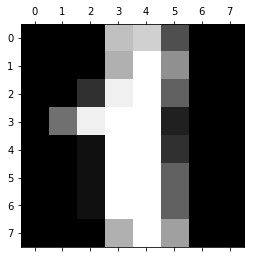

In [479]:
plt.matshow(decode[1])
plt.show()

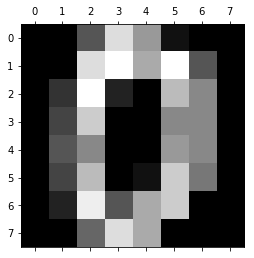

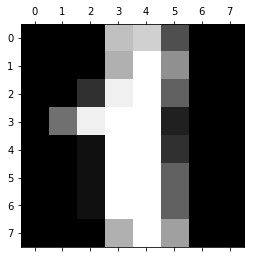

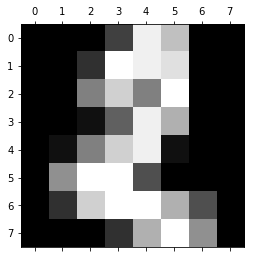

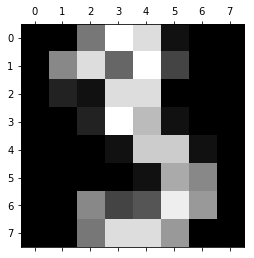

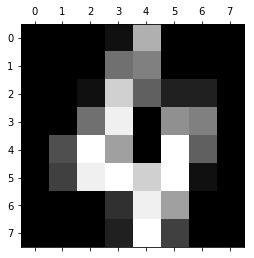

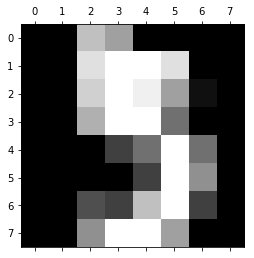

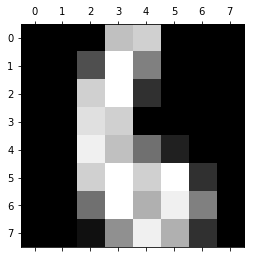

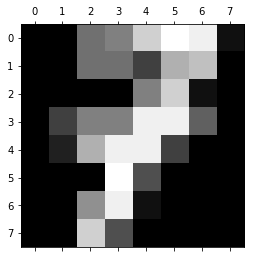

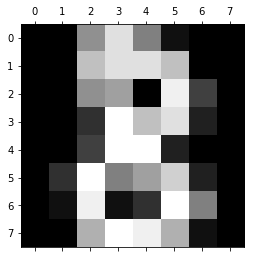

In [480]:
import matplotlib.pyplot as plt 
plt.gray() 
for i in range(0,9):
    plt.matshow(decode[i]) 
plt.show() 

## Appendix

A couple of usefull links:

### What pickle is:

> The pickle module implements binary protocols for serializing and de-serializing a Python object structure. “Pickling” is the process whereby a Python object hierarchy is converted into a byte stream, and “unpickling” is the inverse operation, whereby a byte stream (from a binary file or bytes-like object) is converted back into an object hierarchy. Pickling (and unpickling) is alternatively known as “serialization”, “marshalling,” [1] or “flattening”; however, to avoid confusion, the terms used here are “pickling” and “unpickling”.

Warning The pickle module is not secure against erroneous or maliciously constructed data. Never unpickle data received from an untrusted or unauthenticated source.

https://docs.python.org/3/library/pickle.html

How Pickle works:
https://rushter.com/blog/pickle-serialization-internals/

### Base64

What is Base64:

>In computer science Base64 is a group of binary-to-text encoding schemes that represent binary data in an ASCII string format by translating it into a radix-64 representation. The term Base64 originates from a specific MIME content transfer encoding. Each Base64 digit represents exactly 6 bits of data. Three 8-bit bytes (i.e., a total of 24 bits) can therefore be represented by four 6-bit Base64 digits.

>Common to all binary-to-text encoding schemes, Base64 is designed to carry data stored in binary formats across channels that only reliably support text content. Base64 is particularly prevalent on the World Wide Web[1] where its uses include the ability to embed image files or other binary assets inside textual assets such as HTML and CSS files.


https://en.wikipedia.org/wiki/Base64

### AES
https://en.wikipedia.org/wiki/Advanced_Encryption_Standard


## Example E2E file

In [358]:
path = r'F:\WGD\Dep 357515-E2E\Data\20190514 - CL selection'

In [350]:
import pandas as pd
# df = pd.read_excel(path+'\'+'tCLxIP.xlsx')
df = pd.read_excel(r'F:\WGD\Dep 357515-E2E\Data\20190514 - CL selection\tCLxIP.xlsx')
                 
                   

In [382]:
df.head()

,IP_ID,CL_SCHEME_ID,CLxIP_TP_ID,RNK,EFF_DAT,SOURCE_SYSTEM_ID,CL_VALUE_ID,END_DAT,CLxIP_LCS_TP_ID,RLTNP_LCS_DAT,DESCRIPTION,CLxIP_LCS_REASON_TP_ID,DELIVERY_SYSTEM_ID,VERSION_SDAT,VERSION_EDAT,INIT_POPULATION_TMS,LAST_POPULATION_TMS,BUSINESS_RULE_VERSION_NBR,STATUS_IND
0,5010000160233909,31293000Involved Party FATCA Registration Stat...,31293000CL Classifies IP,1,NaN,6025,0602800002,NaN,31293000Active CL/IP Relationship,NaN,-2,-1,6025,19-8-2014,31-12-9999,20-8-2014 05:50:28.000000,20-8-2014 05:50:28.000000,G3__DL_BCDB_13_FATCA:v1.4,1
1,501000032430094,31293000Involved Party CRS Status Type,31293000CL Classifies IP,1,24-3-2017,6089,0609100013,31-12-9999,31293000Active CL/IP Relationship,NaN,-2,-1,6089,13-5-2017,31-12-9999,15-5-2017 17:32:54.000000,15-5-2017 17:32:54.000000,G3__DL_BCDB_14_CRS:v1.78,1
2,5010000125067267,31293000Involved Party CRS Status Type,31293000CL Classifies IP,1,12-11-2016,6089,0609100013,31-12-9999,31293000Active CL/IP Relationship,NaN,-2,-1,6089,13-5-2017,31-12-9999,15-5-2017 17:32:54.000000,15-5-2017 17:32:54.000000,G3__DL_BCDB_14_CRS:v1.78,1
3,501000081456212,31293000Risk Assessment Value,31293000CL is Risk Assessment Value for IP,1,3-11-2006,7099,0709900000,NaN,-2,NaN,-2,-2,5010,8-9-2016,31-12-9999,9-9-2016 01:30:11.000000,9-9-2016 01:30:11.000000,G3__DL_BCDB_16_RAV:v1.16,1
4,5010000109944763,31293000Involved Party CRS Reporting Status Type,31293000CL Classifies IP,1,7-11-2016,6089,0609000002,31-12-9999,31293000Active CL/IP Relationship,NaN,-2,-1,6089,13-5-2017,31-12-9999,15-5-2017 17:32:54.000000,15-5-2017 17:32:54.000000,G3__DL_BCDB_14_CRS:v1.78,1


In [383]:
data= df

import numpy as np

import _pickle as cPickle
import base64
b64 = base64.b64encode(cPickle.dumps(data))

In [384]:
padding = len(b64) % 16
if padding > 0:
    b64padded = b64 + (b'0' * (16 - padding))

In [385]:
from Crypto.Cipher import AES

#create encryption object, with password (16 chars) and Initation Vector (16 chars), essentially a random seed
obj = AES.new('This is a key123', AES.MODE_CBC, 'This is an IV456')

#encrypt the data using the created encryption object
ciphertext = obj.encrypt(b64padded)


In [388]:
with open(r'F:\WGD\Dep 357515-E2E\Data\20190514 - CL selection\tCLxIP_encrypt.pkl', 'wb') as output:  # Overwrites any existing file.
        pickle.dump(ciphertext, output, pickle.HIGHEST_PROTOCOL)

In [389]:
with open(r'F:\WGD\Dep 357515-E2E\Data\20190514 - CL selection\tCLxIP_encrypt.pkl', 'rb') as input:
    ciphertext_ = pickle.load(input)

In [405]:
obj2 = AES.new('This is a key123', AES.MODE_CBC, 'This is an IV456')
decrypt = obj2.decrypt(ciphertext_)

In [406]:
i=len(b64padded)-(16-padding)
b64unpadded = decrypt[0:i]

In [407]:
decode = pickle.loads(base64.b64decode(b64unpadded))

In [409]:
decode.head()

,IP_ID,CL_SCHEME_ID,CLxIP_TP_ID,RNK,EFF_DAT,SOURCE_SYSTEM_ID,CL_VALUE_ID,END_DAT,CLxIP_LCS_TP_ID,RLTNP_LCS_DAT,DESCRIPTION,CLxIP_LCS_REASON_TP_ID,DELIVERY_SYSTEM_ID,VERSION_SDAT,VERSION_EDAT,INIT_POPULATION_TMS,LAST_POPULATION_TMS,BUSINESS_RULE_VERSION_NBR,STATUS_IND
0,5010000160233909,31293000Involved Party FATCA Registration Stat...,31293000CL Classifies IP,1,NaN,6025,0602800002,NaN,31293000Active CL/IP Relationship,NaN,-2,-1,6025,19-8-2014,31-12-9999,20-8-2014 05:50:28.000000,20-8-2014 05:50:28.000000,G3__DL_BCDB_13_FATCA:v1.4,1
1,501000032430094,31293000Involved Party CRS Status Type,31293000CL Classifies IP,1,24-3-2017,6089,0609100013,31-12-9999,31293000Active CL/IP Relationship,NaN,-2,-1,6089,13-5-2017,31-12-9999,15-5-2017 17:32:54.000000,15-5-2017 17:32:54.000000,G3__DL_BCDB_14_CRS:v1.78,1
2,5010000125067267,31293000Involved Party CRS Status Type,31293000CL Classifies IP,1,12-11-2016,6089,0609100013,31-12-9999,31293000Active CL/IP Relationship,NaN,-2,-1,6089,13-5-2017,31-12-9999,15-5-2017 17:32:54.000000,15-5-2017 17:32:54.000000,G3__DL_BCDB_14_CRS:v1.78,1
3,501000081456212,31293000Risk Assessment Value,31293000CL is Risk Assessment Value for IP,1,3-11-2006,7099,0709900000,NaN,-2,NaN,-2,-2,5010,8-9-2016,31-12-9999,9-9-2016 01:30:11.000000,9-9-2016 01:30:11.000000,G3__DL_BCDB_16_RAV:v1.16,1
4,5010000109944763,31293000Involved Party CRS Reporting Status Type,31293000CL Classifies IP,1,7-11-2016,6089,0609000002,31-12-9999,31293000Active CL/IP Relationship,NaN,-2,-1,6089,13-5-2017,31-12-9999,15-5-2017 17:32:54.000000,15-5-2017 17:32:54.000000,G3__DL_BCDB_14_CRS:v1.78,1
